In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

In [23]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [24]:
y = data.target
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


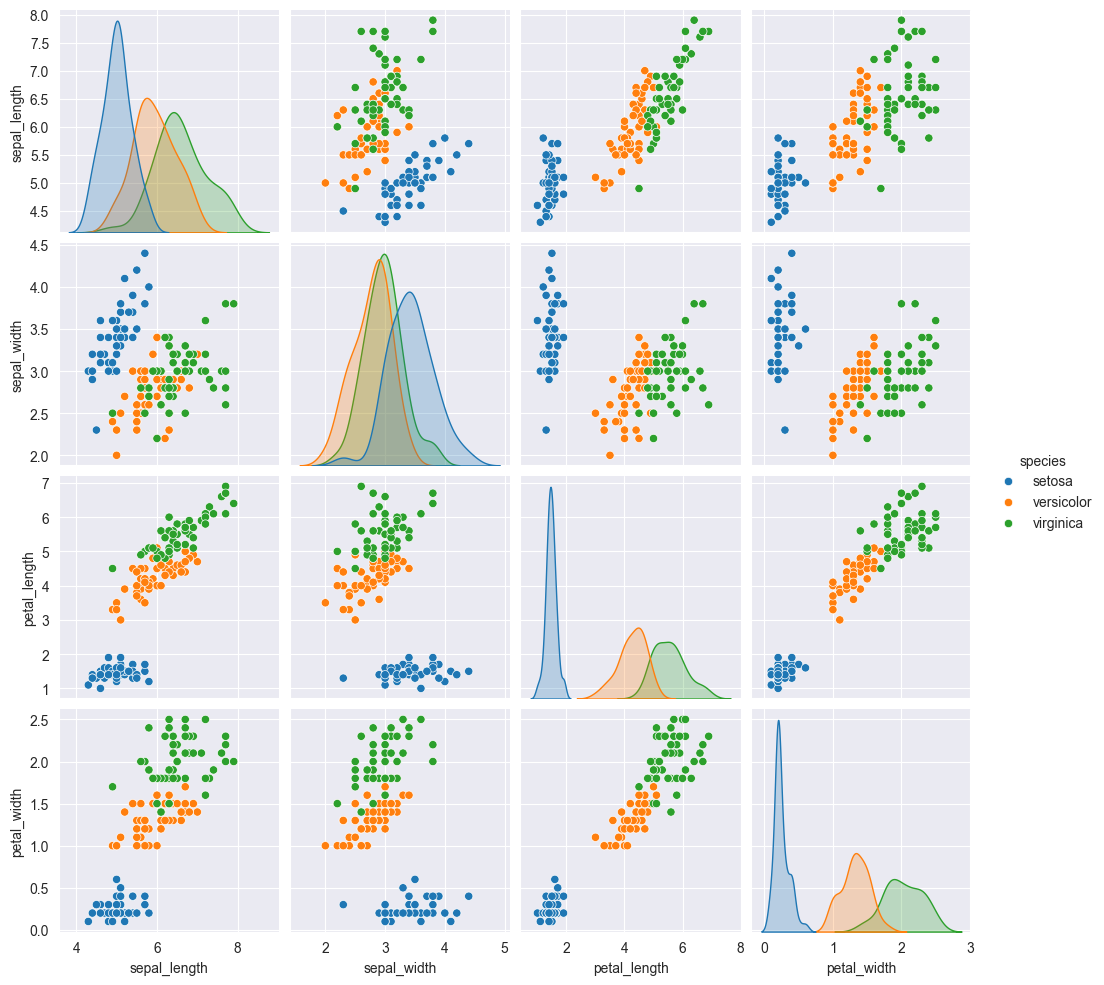

In [25]:
import seaborn as sns

penguins = sns.load_dataset("iris")
sns.pairplot(penguins, hue="species")

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
X = X.values

# Sklearn из коробки

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [30]:
Z = pca.transform(X)

In [31]:
Z.shape

(150, 3)

Отобразим результат проекции

In [32]:
# Отобразим коэффициенты перехода
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [33]:
# отображаем 4 мерное исходное в 3х мерное
pca.components_.shape

(3, 4)

In [34]:
# проверка - домножим Х на коэфф, будем отображать по 5 элементов
X.dot(pca.components_.T)[:5]

array([[ 2.81823951,  5.64634982, -0.65976754],
       [ 2.78822345,  5.14995135, -0.84231699],
       [ 2.61337456,  5.18200315, -0.61395246],
       [ 2.75702228,  5.0086536 , -0.60029334],
       [ 2.7736486 ,  5.65370709, -0.54177348]])

In [35]:
# результат не сходится из-за отсутствия центрирования, которое библиотека делает по умолчанию
Z[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [36]:
# центрируем
X_mean = X - X.mean(axis=0)
# после центрирования результат сходится
X_mean.dot(pca.components_.T)[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [37]:
# дисперсия вдоль каждой компоненты
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [38]:
# доля объясненной дисперсии
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [39]:
pca.explained_variance_ratio_.sum()

0.9947878161267247

<BarContainer object of 3 artists>

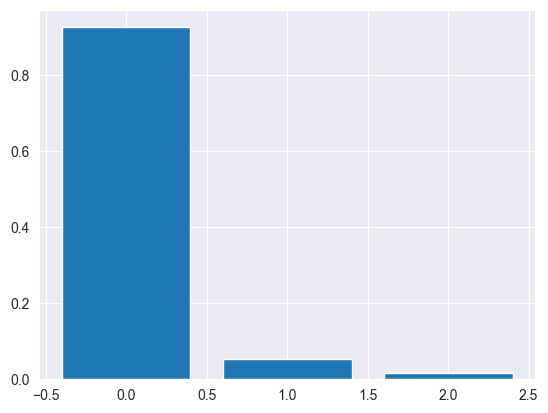

In [40]:
plt.bar(height=pca.explained_variance_ratio_ , x=[0, 1, 2])

# Через сингулярное разложение

In [41]:
# импортируем сингулярное разложение
from numpy.linalg import svd

In [42]:
# будем сразу подавать центрированную
# проведем полное сингулярное разложение
U, D, Vt = svd(X_mean, full_matrices=0, ) # 2й атрибут для корректных размеров Vt = (. , N, M) и U = (. ,M, M)

In [43]:
# проверим размерности, что выполнено полное сингулярное разложение
print(U.shape)
print(D.shape)
print(Vt.shape) # размерности ок

(150, 4)
(4,)
(4, 4)


In [44]:
# в полном сингулярном разложении матрицы полностью восстанавливаются, отобразим 5 значений
# центральная - вектор, так что конвертируем в диагональную
print(U.dot(np.diag(D)).dot(Vt)[:5])

[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]


In [45]:
# сравниваем с центрированной - все ок
X_mean[:5]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

In [46]:
# на всякий случай MSE по каждому компоненту
((U.dot(np.diag(D)).dot(Vt) - X_mean)**2).sum() # получается очнь маленькое число

7.619857610201817e-29

In [47]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [48]:
Vt # элементы те же, но с разными знаками (особенность алгоритма) если в сингулярном строку U и столбец V домножить на -1, то получится тот же результат

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [49]:
Z_SVD = X_mean.dot(Vt[:3].T) # возьмем компоненты Vt полученные из SVD и домножим на центрированную

In [50]:
# сравним результат от сингулярного на 3х с Sklearn
Z_SVD[:5]

array([[-2.68412563, -0.31939725,  0.02791483],
       [-2.71414169,  0.17700123,  0.21046427],
       [-2.88899057,  0.14494943, -0.01790026],
       [-2.74534286,  0.31829898, -0.03155937],
       [-2.72871654, -0.32675451, -0.09007924]])

In [51]:
# результаты совпадают с точностью до знака
Z[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

# Через матрицу ковариации

In [52]:
from numpy.linalg import eig # встроенная функция для нахождения собственных векторов и собственных чисел

In [53]:
# Находим матрицу ковариации
C = X_mean.T.dot(X_mean)

In [54]:
# находим собственные вектора и собственные числа матрицы ковариации
lambd, w = eig(C)

In [55]:
lambd # собственные числа матрицы ковариации

array([630.0080142 ,  36.15794144,  11.65321551,   3.55142885])

In [56]:
w # собственные вектора матрицы ковариации

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [57]:
# сравним с результатами из сингулярного разложения
Vt.T # совпадает

array([[ 0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [-0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [58]:
# доля объясненной дисперсии
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [59]:
lambd/lambd.sum() # совпадают (тут все собственные)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

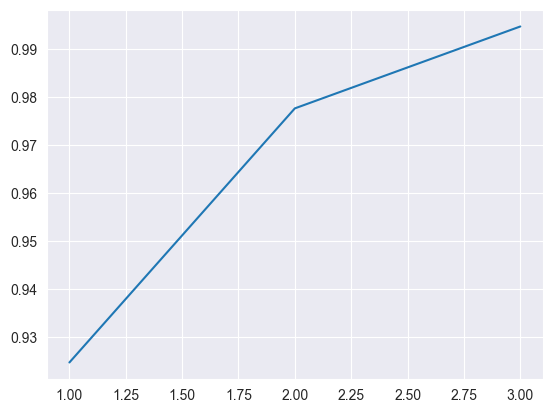

In [60]:
# признаки очень чувствительны к масштабу, что видно по графику - одна компонента объясняет 98%!
# так что вместо центрирования лучше использовать стандартизацию, так вклад масштаба каждого признака будет одинаков

plt.plot([1,2,3], np.cumsum(pca.explained_variance_ratio_))

# Влияние метода PCA на качество

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [62]:
# центрируем признаки и применяем KNN
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

In [63]:
# используем кросс-валидацию на 10 фолдах с перемешкой
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [64]:
# смотрим среднюю долю верно угаданных ответов
cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean()

0.9533333333333334

In [65]:
# как меняется качество с разным количством компонент
for n in range(1, 4):
    # с методом главных компонент
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('clf', KNeighborsClassifier())
    ])
    print(f'Кол-во компонент {n}, Средняя accuracy =', cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean())

# видно, что качество падает не сильно при уменьшении количества компонент

Кол-во компонент 1, Средняя accuracy = 0.9066666666666668
Кол-во компонент 2, Средняя accuracy = 0.9133333333333333
Кол-во компонент 3, Средняя accuracy = 0.96
